- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - 多値分類問題を扱う

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
import xgboost as xgb

In [10]:
#dataset = datasets.load_breast_cancer()
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [11]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [12]:
xgb_params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result)

[0]	train-mlogloss:0.74229	eval-mlogloss:0.76578
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:0.53065	eval-mlogloss:0.56586
[2]	train-mlogloss:0.39291	eval-mlogloss:0.44111
[3]	train-mlogloss:0.29864	eval-mlogloss:0.35772
[4]	train-mlogloss:0.23161	eval-mlogloss:0.30303
[5]	train-mlogloss:0.18313	eval-mlogloss:0.26998
[6]	train-mlogloss:0.14774	eval-mlogloss:0.24459
[7]	train-mlogloss:0.12119	eval-mlogloss:0.22865
[8]	train-mlogloss:0.10136	eval-mlogloss:0.21806
[9]	train-mlogloss:0.08644	eval-mlogloss:0.20913
[10]	train-mlogloss:0.07479	eval-mlogloss:0.20622
[11]	train-mlogloss:0.06401	eval-mlogloss:0.20976
[12]	train-mlogloss:0.05654	eval-mlogloss:0.20498
[13]	train-mlogloss:0.05095	eval-mlogloss:0.20384
[14]	train-mlogloss:0.04637	eval-mlogloss:0.19950
[15]	train-mlogloss:0.04319	eval-mlogloss:0.19810
[16]	train-mlogloss:0.03985	eval-mlogloss:0.19591
[17]	trai

In [13]:
y_pred = bst.predict(dtest)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9333333333333333


In [14]:
print(y_pred)

[2. 1. 2. 1. 2. 2. 1. 1. 0. 2. 0. 0. 2. 2. 0. 2. 1. 0. 0. 0. 1. 0. 1. 2.
 1. 1. 1. 1. 1. 0. 2. 2. 1. 0. 2. 0. 0. 0. 0. 2. 1. 0. 1. 2. 1.]


In [16]:
print(evals_result)

{'train': {'mlogloss': [0.742288, 0.530648, 0.39291, 0.298636, 0.231609, 0.183134, 0.147745, 0.121195, 0.101356, 0.086442, 0.074785, 0.064011, 0.056541, 0.050953, 0.046365, 0.043192, 0.039852, 0.037592, 0.035852, 0.03459, 0.033912, 0.033056, 0.031835, 0.031352, 0.030714, 0.030301]}, 'eval': {'mlogloss': [0.765776, 0.565862, 0.441114, 0.357715, 0.303035, 0.269981, 0.244587, 0.228647, 0.21806, 0.209126, 0.206222, 0.209763, 0.204977, 0.203838, 0.199503, 0.198099, 0.195911, 0.197114, 0.203681, 0.202509, 0.204498, 0.204586, 0.210023, 0.212193, 0.212236, 0.214694]}}


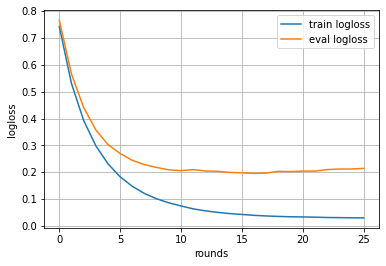

In [18]:
train_metric = evals_result['train']['mlogloss']
plt.plot(train_metric, label='train logloss')
eval_metric = evals_result['eval']['mlogloss']
plt.plot(eval_metric, label='eval logloss')

plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()